In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


In [27]:
df = pd.read_csv("Telco-Customer-Churn.csv", sep=";")

for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    df[col] = df[col].astype(str).str.replace(",", ".").replace(" ", np.nan)
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna(subset=["tenure", "MonthlyCharges", "TotalCharges", "Churn"])

df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0}).astype(int)


C:\Users\diasj\AppData\Local\Temp\ipykernel_5600\1506431744.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0}).astype(int)


In [28]:

def calcular_estatisticas(df, col):
    media = df[col].mean()
    desvio = df[col].std()
    coef_var = (desvio / media) * 100

    churn0 = df[df["Churn"] == 0][col]
    churn1 = df[df["Churn"] == 1][col]

    return {
        "Variável": col,
        "Média": round(media, 2),
        "Desvio Padrão": round(desvio, 2),
        "Coef. Variação (%)": round(coef_var, 2),
        "churn = 0 (Média)": round(churn0.mean(), 2),
        "churn = 0 (Desv. Padrão)": round(churn0.std(), 2),
        "churn = 1 (Média)": round(churn1.mean(), 2),
        "churn = 1 (Desv. Padrão)": round(churn1.std(), 2),
    }

variaveis = ["tenure", "MonthlyCharges", "TotalCharges"]
estatisticas = [calcular_estatisticas(df, col) for col in variaveis]

resultado = pd.DataFrame(estatisticas)

print("=== Estatísticas Descritivas ===")
display(resultado)


=== Estatísticas Descritivas ===


,Variável,Média,Desvio Padrão,Coef. Variação (%),churn = 0 (Média),churn = 0 (Desv. Padrão),churn = 1 (Média),churn = 1 (Desv. Padrão)
0,tenure,32.42,24.55,75.71,37.65,24.08,17.98,19.53
1,MonthlyCharges,64.80,30.09,46.43,61.31,31.09,74.44,24.67
2,TotalCharges,2283.30,2266.77,99.28,2555.34,2329.46,1531.80,1890.82


C:\Users\diasj\AppData\Local\Temp\ipykernel_5600\3289586725.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=var, data=df, palette="Set2")
C:\Users\diasj\AppData\Local\Temp\ipykernel_5600\3289586725.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=var, data=df, palette="Set2")
C:\Users\diasj\AppData\Local\Temp\ipykernel_5600\3289586725.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=var, data=df, palette="Set2")


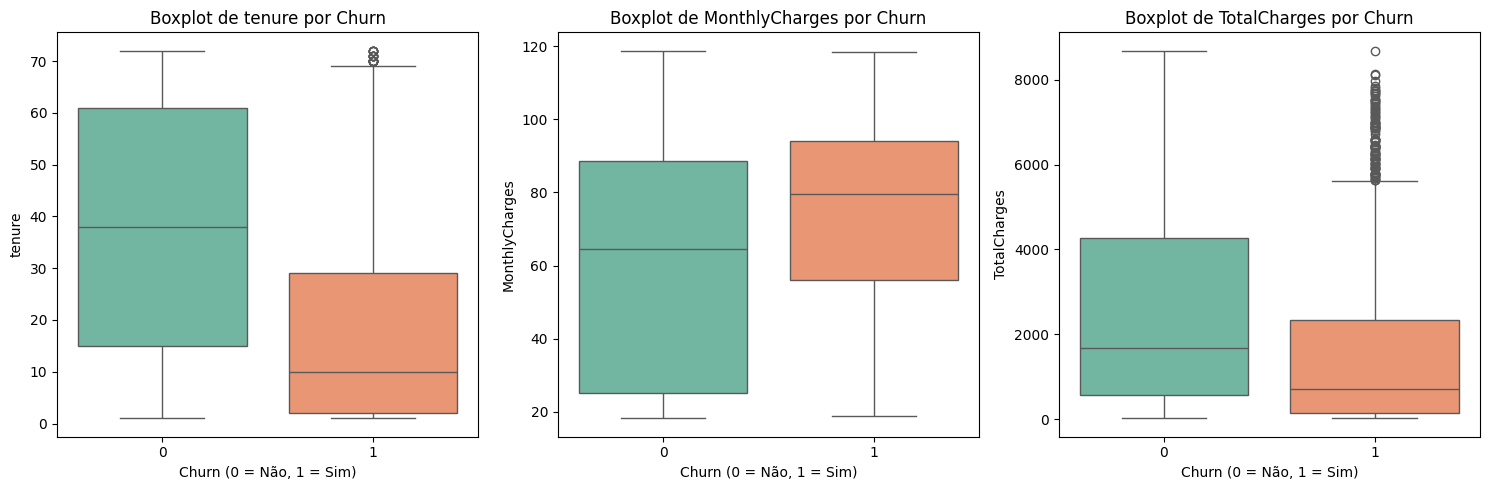

In [29]:
variaveis = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(15, 5))
for i, var in enumerate(variaveis, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Churn", y=var, data=df, palette="Set2")
    plt.title(f"Boxplot de {var} por Churn")
    plt.xlabel("Churn (0 = Não, 1 = Sim)")
    plt.ylabel(var)
plt.tight_layout()
plt.show()

In [30]:

variaveis_numericas = ["tenure", "MonthlyCharges", "TotalCharges"]
variaveis_categoricas = ["gender", "InternetService", "Contract"]

numero_usp = 13828592
train_df, test_df = train_test_split(df, test_size=0.3, random_state=numero_usp, stratify=df["Churn"])

print(f"Tamanho da base de treino: {train_df.shape[0]} linhas")
print(f"Tamanho da base de teste: {test_df.shape[0]} linhas")

def estatisticas_numericas(df, variaveis):
    resultado = []
    for var in variaveis:
        churn0 = df[df["Churn"] == 0][var]
        churn1 = df[df["Churn"] == 1][var]
        resultado.append({
            "Variável": var,
            "churn=0 (Média)": round(churn0.mean(), 2),
            "churn=0 (Desv.Padrão)": round(churn0.std(), 2),
            "churn=1 (Média)": round(churn1.mean(), 2),
            "churn=1 (Desv.Padrão)": round(churn1.std(), 2)
        })
    return pd.DataFrame(resultado)

estat_num = estatisticas_numericas(train_df, variaveis_numericas)
print("\n📈 Estatísticas Descritivas - Variáveis Numéricas:")
display(estat_num)

def estatisticas_categoricas(df, variaveis):
    resultados = {}
    for var in variaveis:
        tab = pd.crosstab(df[var], df["Churn"], margins=False)
        freq_rel = (tab / tab.sum()) * 100
        resultados[var] = pd.concat([tab, freq_rel], axis=1, keys=["Frequência Absoluta", "Frequência Relativa (%)"])
    return resultados

estat_cat = estatisticas_categoricas(train_df, variaveis_categoricas)

for var, tabela in estat_cat.items():
    print(f"\n📊 Variável Categórica: {var}")
    display(tabela)


Tamanho da base de treino: 4922 linhas
Tamanho da base de teste: 2110 linhas

📈 Estatísticas Descritivas - Variáveis Numéricas:


,Variável,churn=0 (Média),churn=0 (Desv.Padrão),churn=1 (Média),churn=1 (Desv.Padrão)
0,tenure,37.55,24.14,18.19,19.73
1,MonthlyCharges,61.07,31.13,74.68,24.88
2,TotalCharges,2540.72,2324.31,1558.06,1919.94



📊 Variável Categórica: gender


Frequência Absoluta      Frequência Relativa (%)           
Churn                    0    1                       0          1
gender                                                            
Female                1777  684               49.169895  52.293578
Male                  1837  624               50.830105  47.706422


📊 Variável Categórica: InternetService


Frequência Absoluta      Frequência Relativa (%)           
Churn                             0    1                       0          1
InternetService                                                            
DSL                            1360  330               37.631433  25.229358
Fiber optic                    1256  902               34.753735  68.960245
No                              998   76               27.614831   5.810398


📊 Variável Categórica: Contract


Frequência Absoluta       Frequência Relativa (%)           
Churn                            0     1                       0          1
Contract                                                                   
Month-to-month                1545  1154               42.750415  88.226300
One year                       917   122               25.373547   9.327217
Two year                      1152    32               31.876038   2.446483

In [32]:
num_vars = ["tenure", "MonthlyCharges", "TotalCharges"]
cat_vars = ["gender", "InternetService", "Contract"]

le = LabelEncoder()
for col in cat_vars:
    df[col] = le.fit_transform(df[col])

numero_usp = 13828592
X = df[num_vars + cat_vars]
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=numero_usp, stratify=y
)

scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

def avaliar_modelo(modelo, nome):
    modelo.fit(X_train, y_train)

    # Previsões
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    # Matrizes de confusão
    matriz_train = confusion_matrix(y_train, y_pred_train)
    matriz_test = confusion_matrix(y_test, y_pred_test)

    # Métricas
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)

    # Variância
    var_acc = abs(acc_train - acc_test)
    var_f1 = abs(f1_train - f1_test)

    print(f"\n{'='*70}")
    print(f"📊 Modelo: {nome}")
    print(f"{'-'*70}")
    print("\nMatriz de Confusão - Treino:")
    print(pd.DataFrame(matriz_train, index=['Obs 0','Obs 1'], columns=['Pred 0','Pred 1']))

    print("\nMatriz de Confusão - Teste:")
    print(pd.DataFrame(matriz_test, index=['Obs 0','Obs 1'], columns=['Pred 0','Pred 1']))

    print(f"\nAcurácia Treino: {acc_train:.4f} | Teste: {acc_test:.4f}")
    print(f"F1-Score Treino: {f1_train:.4f} | Teste: {f1_test:.4f}")
    print(f"\n📈 Variância (Treino - Teste):")
    print(f"Acurácia: {var_acc:.4f} | F1-Score: {var_f1:.4f}")

    return {
        "Modelo": nome,
        "Acurácia Treino": acc_train,
        "Acurácia Teste": acc_test,
        "F1 Treino": f1_train,
        "F1 Teste": f1_test,
        "Var Acurácia": var_acc,
        "Var F1": var_f1
    }

resultados = []

modelo_log = LogisticRegression(max_iter=1000)
resultados.append(avaliar_modelo(modelo_log, "Regressão Logística"))

modelo_tree = DecisionTreeClassifier(random_state=numero_usp, max_depth=5)
resultados.append(avaliar_modelo(modelo_tree, "Árvore de Decisão"))

modelo_knn = KNeighborsClassifier(n_neighbors=5)
resultados.append(avaliar_modelo(modelo_knn, "K-Nearest Neighbors"))

resultados_df = pd.DataFrame(resultados)
display(resultados_df)



📊 Modelo: Regressão Logística
----------------------------------------------------------------------

Matriz de Confusão - Treino:
       Pred 0  Pred 1
Obs 0    3229     385
Obs 1     672     636

Matriz de Confusão - Teste:
       Pred 0  Pred 1
Obs 0    1387     162
Obs 1     281     280

Acurácia Treino: 0.7852 | Teste: 0.7900
F1-Score Treino: 0.5462 | Teste: 0.5583

📈 Variância (Treino - Teste):
Acurácia: 0.0048 | F1-Score: 0.0122

📊 Modelo: Árvore de Decisão
----------------------------------------------------------------------

Matriz de Confusão - Treino:
       Pred 0  Pred 1
Obs 0    3268     346
Obs 1     630     678

Matriz de Confusão - Teste:
       Pred 0  Pred 1
Obs 0    1384     165
Obs 1     286     275

Acurácia Treino: 0.8017 | Teste: 0.7863
F1-Score Treino: 0.5815 | Teste: 0.5495

📈 Variância (Treino - Teste):
Acurácia: 0.0155 | F1-Score: 0.0320

📊 Modelo: K-Nearest Neighbors
----------------------------------------------------------------------

Matriz de Confusã

,Modelo,Acurácia Treino,Acurácia Teste,F1 Treino,F1 Teste,Var Acurácia,Var F1
0,Regressão Logística,0.785250,0.790047,0.546157,0.558325,0.004797,0.012168
1,Árvore de Decisão,0.801707,0.786256,0.581475,0.549451,0.015451,0.032025
2,K-Nearest Neighbors,0.839496,0.773460,0.669456,0.538610,0.066036,0.130846
